In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import os
import json
from tqdm import tqdm
from detectors.utils import append_results_to_csv_file

# Validation

In [23]:
pipeline = "ood_validation_imagenet"
df = pd.read_csv(f'../results/{pipeline}/scores.csv')
dfres = pd.read_csv(f'../results/{pipeline}/results.csv')


# filter indexes in dfres to df based on seed
indexes = dfres.query('seed == 1').index
df = df[df.index.isin(indexes)]

# drop duplicates
df = df.drop_duplicates(subset=['model', 'method', 'method_kwargs'], keep='last', ignore_index=True)
print(len(df))
print(df["model"].unique())
assert len(df["labels"].unique()) == 1
df.head()


87
['tv_resnet50' 'tv_densenet121' 'deit_base_patch16_224'
 'vit_base_patch16_224']


,model,in_dataset_name,out_datasets_names,method,method_kwargs,scores,labels
0,tv_resnet50,ilsvrc2012,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",dice,{'p': 0.8},"[13.740922927856445, 16.852956771850586, 15.51...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
1,tv_resnet50,ilsvrc2012,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",gradnorm,{'temperature': 81.4},"[171.16943359375, 303.37652587890625, 273.8057...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
2,tv_resnet50,ilsvrc2012,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",energy,"{'temperature': 3.0, 'eps': 0.008}","[22.72772979736328, 22.580915451049805, 23.049...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
3,tv_densenet121,ilsvrc2012,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",dice,{'p': 0.75},"[15.465954780578613, 16.702341079711914, 16.67...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
4,tv_resnet50,ilsvrc2012,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",doctor,"{'temperature': 3.9000000000000004, 'eps': 0.0...","[-0.9982491135597229, -0.9980820417404175, -0....","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."


In [38]:
model_name = "vit_base_patch16_224"
sub = df.query(f"model == '{model_name}'")
# drop duplicates
sub = sub.drop_duplicates(subset=['method', 'method_kwargs'], keep='last', ignore_index=True)
sub = sub[['method', 'out_datasets_names', 'method_kwargs', 'scores', 'labels']]
sub.reset_index(drop=True, inplace=True)
sub["scores"] = sub["scores"].apply(lambda x: json.loads(x))
sub["labels"] = sub["labels"].apply(lambda x: json.loads(x))
sub=sub.iloc[:5]
sub

,method,out_datasets_names,method_kwargs,scores,labels
0,msp,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{},"[0.6242302060127258, 0.4743275046348572, 0.366...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
1,kl_matching,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{},"[-0.5272321105003357, -1.2670462131500244, -2....","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
2,max_logits,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{},"[8.137481689453125, 7.965069770812988, 7.65368...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
3,dice,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{'p': 0.6},"[6.903929710388184, 6.902220726013184, 6.94715...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
4,vim,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{},"[-2.689821243286133, -6.0728654861450195, -7.6...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
5,energy,"['mos_inaturalist', 'mos_sun', 'mos_places365'...","{'temperature': 374.0, 'eps': 0.001}","[2583.533935546875, 2583.48486328125, 2583.445...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
6,react,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{'p': 0.9500000000000001},"[8.02027702331543, 7.911036968231201, 8.003662...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."
7,gradnorm,"['mos_inaturalist', 'mos_sun', 'mos_places365'...",{'temperature': 775.6},"[1.0003983974456787, 1.3475279808044434, 1.450...","[8, 8, 8, 8, 0, 2, 0, 8, 0, 6, 6, 8, 9, 2, 3, ..."


In [39]:
# ood scores
from collections import defaultdict
from detectors.eval import get_ood_results


out_datasets_names = sub["out_datasets_names"].unique().tolist()[0][2:-2].replace("'","").split(", ")
# cycle over rows
results = defaultdict(dict)
for _, row in sub.iterrows():
    method_name = row["method"]
    test_scores = np.array(row["scores"])
    test_labels = np.array(row["labels"])
    in_scores = test_scores[test_labels == 0]

    for i, ood_dataset_name in enumerate(out_datasets_names):
        ood_scores = test_scores[test_labels == (i + 1)]
        results[method_name][ood_dataset_name] = {"auroc": get_ood_results(in_scores, ood_scores)["auroc"]}

    results[method_name]["average"] = {
        k: np.mean([results[method_name][ds][k] for ds in out_datasets_names])
        for k in results[method_name][out_datasets_names[0]].keys()
    }

res = pd.DataFrame()
for method_name, r in results.items():
    method_res = pd.DataFrame()
    for ood_dataset_name, v in r.items():
        method_res[ood_dataset_name] = pd.Series(v)
    method_res["method"] = method_name
    res = pd.concat([res, method_res], axis=0)

# sort by abverage
res = res.sort_values(by="average", ascending=False)
top5 = res.head(5)
top10 = res.head(10)
res


,mos_inaturalist,mos_sun,mos_places365,textures,imagenet_o,openimage_o,imagenet_a,imagenet_r,uniform,gaussian,average,method
auroc,0.963622,0.849516,0.808959,0.861168,0.821504,0.937089,0.849642,0.815864,0.998429,0.998730,0.890452,react
auroc,0.931869,0.852463,0.834396,0.844849,0.782336,0.901142,0.875146,0.803064,0.971355,0.971439,0.876806,kl_matching
auroc,0.926086,0.846812,0.828491,0.826409,0.735897,0.889660,0.842398,0.775085,0.996643,0.997165,0.866465,msp
auroc,0.931769,0.847634,0.811768,0.837409,0.749719,0.896409,0.806739,0.755742,0.999077,0.999255,0.863552,max_logits
auroc,0.970655,0.851754,0.817102,0.858460,0.831424,0.930256,0.895020,0.863599,0.688205,0.654603,0.836108,vim
auroc,0.315502,0.558996,0.586633,0.684694,0.616651,0.529395,0.494557,0.607238,0.318988,0.328504,0.504116,energy
auroc,0.085929,0.350335,0.349252,0.326258,0.296762,0.167394,0.213805,0.205081,0.585062,0.586612,0.316649,dice
auroc,0.076628,0.186063,0.203538,0.198026,0.226889,0.118326,0.125394,0.153020,0.414769,0.406550,0.210920,gradnorm


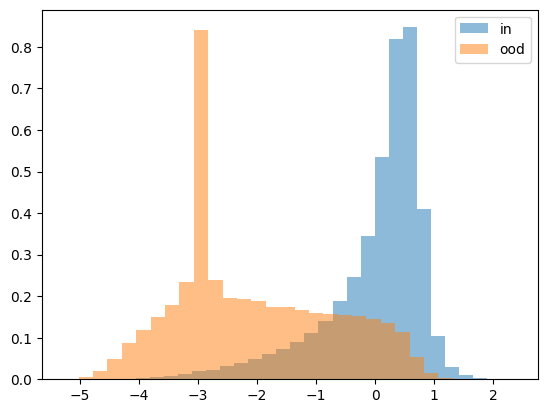

{'mos_inaturalist': {'auroc': 0.962265688},
 'mos_sun': {'auroc': 0.868145258},
 'mos_places365': {'auroc': 0.839272946},
 'textures': {'auroc': 0.8645305035460994},
 'imagenet_o': {'auroc': 0.80621597},
 'openimage_o': {'auroc': 0.9317189786916817},
 'imagenet_a': {'auroc': 0.8824140533333333},
 'imagenet_r': {'auroc': 0.8263882133333333},
 'uniform': {'auroc': 0.9890789980000001},
 'gaussian': {'auroc': 0.9896569099999999},
 'average': {'auroc': 0.8959687518904449}}

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import QuantileTransformer

# all in scores
in_scores = []
ood_scores = []
all_test_scores = []
labels = []
for _, row in sub.iterrows():
    if row["method"] not in top5["method"].tolist():
        continue
    method_name = row["method"]
    test_scores = np.array(row["scores"])
    test_labels = np.array(row["labels"])
    in_scores.append(test_scores[test_labels == 0].reshape(-1, 1))
    ood_scores.append(test_scores[test_labels !=0 ].reshape(-1, 1))
    all_test_scores.append(test_scores.reshape(-1, 1))
    labels.append(test_labels.reshape(-1, 1))
in_scores = np.concatenate(in_scores, axis=1)
ood_scores = np.concatenate(ood_scores, axis=1)
test_labels = np.concatenate(labels, axis=1).mean(axis=1)
all_test_scores = np.concatenate(all_test_scores, axis=1)
in_scores.shape, ood_scores.shape, all_test_scores.shape, test_labels.shape

n = 1000
train_indices = np.random.choice(in_scores.shape[0], n, replace=False)
train_scores = in_scores[train_indices]

# gmm = GaussianMixture(n_components=in_scores.shape[1], covariance_type="full", random_state=42)
# gmm.fit(train_scores)
# pred_scores = gmm.score_samples(all_test_scores)

scores = ((all_test_scores - train_scores.mean(0)) / train_scores.std(0)).mean(axis=1)
# pred_scores = np.trapz((all_test_scores - train_scores.mean(0)) / train_scores.std(0), axis=1)
# trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
# trans.fit(train_scores)

# pred_scores = trans.transform(all_test_scores).mean(1)
pred_in_scores = scores[test_labels == 0]
pred_ood_scores = scores[test_labels != 0]

plt.hist(pred_in_scores, bins=30, alpha=0.5, label="in", density=True)
plt.hist(pred_ood_scores, bins=30, alpha=0.5, label="ood", density=True)
plt.legend()
plt.show()

gmm_results = {}
# out_datasets_names = [ds for ds in out_datasets_names if ds != "gaussian"]
for i, ood_dataset_name in enumerate(out_datasets_names):
    gmm_ood_scores = scores[test_labels == (i + 1)]
    gmm_results[ood_dataset_name] = {"auroc": get_ood_results(pred_in_scores, gmm_ood_scores)["auroc"]}

gmm_results["average"] = {
    k: np.mean([gmm_results[ds][k] for ds in out_datasets_names])
    for k in gmm_results[out_datasets_names[0]].keys()
}
gmm_results

# Covariate Drift Detection Ensemble

In [169]:
pipeline = "covariate_drift_imagenet"
df = pd.read_csv(f'../results/{pipeline}/scores.csv')
dfres = pd.read_csv(f'../results/{pipeline}/results.csv')

# filter indexes in dfres to df based on seed
indexes = dfres.query('seed == 1').index
splits = json.loads(dfres["splits"].unique()[0])
print(splits)
df = df[df.index.isin(indexes)]
# join df and dfres
# concatenate both df and remove duplicate columns
df = pd.concat([df, dfres], axis=1)
# remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# drop duplicates
df = df.drop_duplicates(subset=['model', 'method', 'method_kwargs', 'corruption'], keep='last', ignore_index=True)
print(len(df))
print(df["model"].unique())
assert len(df["labels"].unique()) == 1
# assert len(df["preds"].unique()) == len(df["model"].unique()) 
df.head()

[0, 2000, 10333, 18666, 26999, 35332, 43665, 51998]
1045
['tv_resnet50' 'tv_densenet121' 'vit_base_patch16_224']


,model,method,method_kwargs,scores,labels,preds,targets,corruption,intensities,corr_acc,corr_drift,auroc_drift,auroc_mistakes,fpr_drift,fpr_mistakes,first_drift,splits,seed
0,tv_resnet50,energy,{},"[13.612788200378418, 29.464153289794922, 16.21...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18, 952, 809, 300, 382, 542, 539, 189, 985, 4...","[18, 952, 809, 300, 382, 523, 539, 189, 985, 4...",jpeg_compression,"[1, 2, 3, 4, 5]",0.956674,0.736679,0.711538,0.796276,0.842038,0.693309,3035,"[0, 2000, 10333, 18666, 26999, 35332, 43665, 5...",1
1,tv_resnet50,msp,{},"[0.9752296209335327, 0.9999998807907104, 0.804...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18, 952, 809, 300, 382, 542, 539, 189, 985, 4...","[18, 952, 809, 300, 382, 523, 539, 189, 985, 4...",jpeg_compression,"[1, 2, 3, 4, 5]",0.970277,0.687887,0.688991,0.864935,0.844281,0.465949,3035,"[0, 2000, 10333, 18666, 26999, 35332, 43665, 5...",1
2,tv_resnet50,energy,{},"[13.612788200378418, 29.464153289794922, 16.21...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18, 952, 809, 300, 382, 542, 539, 189, 985, 4...","[18, 952, 809, 300, 382, 523, 539, 189, 985, 4...",contrast,"[1, 2, 3, 4, 5]",0.980119,0.737035,0.849138,0.862701,0.681996,0.583631,3035,"[0, 2000, 10333, 18666, 26999, 35332, 43665, 5...",1
3,tv_resnet50,msp,{},"[0.9752296209335327, 0.9999998807907104, 0.804...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18, 952, 809, 300, 382, 542, 539, 189, 985, 4...","[18, 952, 809, 300, 382, 523, 539, 189, 985, 4...",contrast,"[1, 2, 3, 4, 5]",0.991269,0.642426,0.811626,0.897546,0.720258,0.406922,3035,"[0, 2000, 10333, 18666, 26999, 35332, 43665, 5...",1
4,tv_resnet50,energy,{},"[13.612788200378418, 29.464153289794922, 16.21...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18, 952, 809, 300, 382, 542, 539, 189, 985, 4...","[18, 952, 809, 300, 382, 523, 539, 189, 985, 4...",zoom_blur,"[1, 2, 3, 4, 5]",0.959254,0.931655,0.868465,0.814619,0.565264,0.596776,3035,"[0, 2000, 10333, 18666, 26999, 35332, 43665, 5...",1


In [174]:
model_name = "vit_base_patch16_224"
sub = df.query(f"model == '{model_name}'")
# drop duplicates
ban_methods = ['react','vim','gradnorm','dice', 'mcdropout', 'projection', 'gmm', 'knn_cosine', 'knn_projection', 'doctor']
sub = sub[~sub["method"].isin(ban_methods)]
# sub = sub.drop_duplicates(subset=['method', 'method_kwargs'], keep='last', ignore_index=True)
sub = sub[['method', 'corruption', 'scores', 'labels', 'preds', 'targets']]
sub.reset_index(drop=True, inplace=True)
sub["scores"] = sub["scores"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
sub["labels"] = sub["labels"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
sub["preds"] = sub["preds"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
sub["targets"] = sub["targets"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
# groupby corruption
sub = sub.groupby(["corruption"])
data = {}
for group in sub.groups:
    data[group] = {}
    aux = sub.get_group(group).sort_values(by="method")
    # print sorted methods
    print(group, aux["method"].values)
    aux.reset_index(drop=True, inplace=True)
    data[group]["scores"] = torch.from_numpy(np.concatenate(aux["scores"].values, axis=1)).to(torch.float32)
    data[group]["labels"] = torch.from_numpy(np.concatenate(aux["labels"].values, axis=1)).to(torch.float32)
    data[group]["preds"] = torch.from_numpy(np.concatenate(aux["preds"].values, axis=1)).to(torch.float32)
    data[group]["targets"] = torch.from_numpy(np.concatenate(aux["targets"].values, axis=1)).to(torch.float32)
    # print(group, (data[group]["labels"].std(1).mean().item(), data[group]["targets"].std(1).mean().item(), data[group]["preds"].std(1).mean().item()))
    # assert (data[group]["labels"].std(1).mean(), data[group]["targets"].std(1).std(), data[group]["preds"].std(1).std()) == (0.0,0.0,0.0), (data[group]["labels"].std(1).mean(), data[group]["targets"].std(1).std(), data[group]["preds"].std(1).std())
# drop contrast and defocus blur
# data.pop("contrast")
# data.pop("defocus_blur")

brightness ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
contrast ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
defocus_blur ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
elastic_transform ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
fog ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
frost ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
gaussian_blur ['energy' 'igeood_logits' 'kl_matching' 'knn_euclides' 'mahalanobis'
 'max_logits' 'maxcosine' 'msp' 'odin' 'relative_mahalanobis']
g

In [4]:
from typing import Any, Dict
from torch import Tensor
import torch.nn.functional as F
import numpy as np
import sklearn
import sklearn.metrics
import detectors


def postprocess(
    test_scores: Tensor,
    test_preds: Tensor,
    test_targets: Tensor,
    test_labels: Tensor,
    stride=1,
    alpha=0.99,
    acc_threshold=0.90,
    batch_size=128,
    warmup_size=2000,
    splits=[0, 2000, 10333, 18666, 26999, 35332, 43665, 51998],
    **kwargs,
) -> Dict[str, Any]:
    win_size = batch_size

    avg_warmup = test_scores[: warmup_size].mean().item()
    data_padded = F.pad(test_scores.unsqueeze(0), (win_size - 1, 0), "constant", avg_warmup).squeeze(0)
    moving_average = data_padded.unfold(0, win_size, stride).mean(dim=1)

    ema = test_scores.clone()
    ema[0] = avg_warmup
    for i in range(1, len(test_scores)):
        ema[i] = alpha * ema[i - 1] + (1 - alpha) * test_scores[i]

    mistakes = (test_preds != test_targets).float()
    mistakes_padded = F.pad(mistakes.unsqueeze(0), (win_size - 1, 0), "constant", 0).squeeze(0)
    moving_accuracy = 1 - mistakes_padded.unfold(0, win_size, stride).mean(dim=1)

    # define real drift event: when moving accuracy is below threshold compared to testing accuracy
    acc = moving_accuracy[splits[1] : splits[1] + (splits[2] - splits[1]) // 2].mean().item()
    ref = acc_threshold * acc

    drift_labels = (moving_accuracy < ref).float()
    corr_drift = np.corrcoef(-moving_average.numpy(), drift_labels.numpy())[0, 1]
    corr_acc = np.corrcoef(moving_average.numpy(), moving_accuracy.numpy())[0, 1]

    # check error if theres is only one label on drift_labels
    if len(np.unique(drift_labels.numpy())) == 1:
        auroc_drift = 1.0
    else:
        auroc_drift = float(sklearn.metrics.roc_auc_score(drift_labels, -test_scores))

    if len(np.unique(mistakes.numpy())) == 1:
        auroc_mistakes = 1.0
    else:
        auroc_mistakes = float(sklearn.metrics.roc_auc_score(mistakes, -test_scores))

    fprs, tprs, thresholds = sklearn.metrics.roc_curve(drift_labels, -test_scores)
    fpr_drift, _, _ = detectors.eval.fpr_at_fixed_tpr(fprs, tprs, thresholds, 0.95)

    fprs, tprs, thresholds = sklearn.metrics.roc_curve(mistakes, -test_scores)
    fpr_mistakes, _, _ = detectors.eval.fpr_at_fixed_tpr(fprs, tprs, thresholds, 0.95)

    return dict(
        drift_labels=drift_labels,
        first_drift=torch.argmax(drift_labels).item(),
        ref_accuracy=ref,
        splits=splits,
        corr_acc=corr_acc,
        corr_drift=corr_drift,
        auroc_drift=auroc_drift,
        auroc_mistakes=auroc_mistakes,
        fpr_drift=fpr_drift,
        fpr_mistakes=fpr_mistakes,
        moving_average=moving_average,
        ema=ema,
        moving_accuracy=moving_accuracy,
        mistakes=mistakes,
    )


In [176]:
# ensemble
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from tqdm import tqdm

results_per_corruption = {}
for corruption in tqdm(data):
    all_test_scores = data[corruption]["scores"].numpy()
    targets = data[corruption]["targets"].numpy().mean(1).astype(int)
    preds = data[corruption]["preds"].numpy().mean(1).astype(int)
    labels = (targets!=preds).astype(int)

    train_scores = all_test_scores[:2000]
    # preprocessor = QuantileTransformer(output_distribution='normal')
    # train_scores = preprocessor.fit_transform(train_scores)
    # all_test_scores = preprocessor.transform(all_test_scores)

    # model = GaussianMixture(n_components=3)
    # model.fit(train_scores)
    # pred_scores = model.score_samples(all_test_scores)
    scores = ((all_test_scores - train_scores.mean(0)) / train_scores.std(0)).mean(1)
    results_per_corruption[corruption] = postprocess(
        torch.tensor(scores),
        torch.tensor(preds),
        torch.tensor(targets),
        torch.tensor(labels),
        splits=splits)

all_auroc_mistakes = np.array([results_per_corruption[corruption]["auroc_mistakes"] for corruption in results_per_corruption])
all_auroc_drift = np.array([results_per_corruption[corruption]["auroc_drift"] for corruption in results_per_corruption])
all_auroc_mistakes.mean(), all_auroc_drift.mean()

100%|██████████| 19/19 [00:07<00:00,  2.48it/s]


(0.8403537101561965, 0.710557554326388)

In [12]:
for pipeline in tqdm(["covariate_drift_cifar10", "covariate_drift_cifar100", "covariate_drift_imagenet"]):
    df = pd.read_csv(f'../results/{pipeline}/scores.csv')
    dfres = pd.read_csv(f'../results/{pipeline}/results.csv')

    # filter indexes in dfres to df based on seed
    indexes = dfres.query('seed == 1').index
    splits = json.loads(dfres["splits"].unique()[0])
    first_drift = dfres["first_drift"].unique()[0]

    df = df[df.index.isin(indexes)]
    df = pd.concat([df, dfres], axis=1)
    df = df.loc[:, ~df.columns.duplicated()]

    df = df.drop_duplicates(subset=['model', 'method', 'method_kwargs', 'corruption'], keep='last', ignore_index=True)
    df = df.dropna(subset=['method','model', 'method_kwargs', 'corruption'], how='any')
    print(df["model"].unique())
    assert len(df["labels"].unique()) == 1
    dest = f"../results/{pipeline}/results_ensemble.csv"
    for model_name in tqdm(["densenet121_cifar10","resnet34_cifar10","vit_base_patch16_224_in21k_ft_cifar10","densenet121_cifar100","resnet34_cifar100","vit_base_patch16_224_in21k_ft_cifar100","tv_resnet50", "tv_densenet121", "vit_base_patch16_224"]):
        try:
            sub = df.query(f"model == '{model_name}'")
            # drop duplicates
            ban_methods = ['react','vim','gradnorm','dice', 'mcdropout', 'projection', 'gmm', 'knn_cosine', 'knn_projection', 'doctor']
            sub = sub[~sub["method"].isin(ban_methods)]
            # sub = sub.drop_duplicates(subset=['method', 'method_kwargs'], keep='last', ignore_index=True)
            sub = sub[['method', 'corruption', 'scores', 'labels', 'preds', 'targets']]
            sub.reset_index(drop=True, inplace=True)
            sub["scores"] = sub["scores"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
            sub["labels"] = sub["labels"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
            sub["preds"] = sub["preds"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
            sub["targets"] = sub["targets"].apply(lambda x: np.array(json.loads(x)).reshape(-1,1))
            # groupby corruption
            sub = sub.groupby(["corruption"])
            data = {}
            for group in sub.groups:
                data[group] = {}
                aux = sub.get_group(group).sort_values(by="method")
                # print sorted methods
                aux.reset_index(drop=True, inplace=True)
                data[group]["scores"] = torch.from_numpy(np.concatenate(aux["scores"].values, axis=1)).to(torch.float32)
                data[group]["labels"] = torch.from_numpy(np.concatenate(aux["labels"].values, axis=1)).to(torch.float32)
                data[group]["preds"] = torch.from_numpy(np.concatenate(aux["preds"].values, axis=1)).to(torch.float32)
                data[group]["targets"] = torch.from_numpy(np.concatenate(aux["targets"].values, axis=1)).to(torch.float32)

            for corruption in tqdm(data):
                all_test_scores = data[corruption]["scores"].numpy()
                targets = data[corruption]["targets"].numpy().mean(1).astype(int)
                preds = data[corruption]["preds"].numpy().mean(1).astype(int)
                labels = (targets!=preds).astype(int)

                train_scores = all_test_scores[:2000]

                scores = torch.from_numpy(((all_test_scores - train_scores.mean(0)) / train_scores.std(0)).mean(1))
                preds = torch.from_numpy(preds)
                targets = torch.from_numpy(targets)
                labels = torch.from_numpy(labels)
                
                results = postprocess(
                    scores,
                    preds,
                    targets,
                    labels,
                    splits=splits)
                # save results
                path = os.path.join("../results", pipeline, "results.csv")
                save_results = {
                    "model": model_name,
                    "method": "ensemble",
                    "method_kwargs": {},
                    "corruption": corruption,
                    "intensities": [1,2,3,4,5],
                    "corr_acc": results["corr_acc"],
                    "corr_drift": results["corr_drift"],
                    "auroc_drift": results["auroc_drift"],
                    "auroc_mistakes": results["auroc_mistakes"],
                    "fpr_drift": results["fpr_drift"],
                    "fpr_mistakes": results["fpr_mistakes"],
                    "first_drift": results["first_drift"],
                    "splits": splits,
                    "seed": 1,
                }
                append_results_to_csv_file(save_results, path)

                results = {
                    "model": model_name,
                    "method": "ensemble",
                    "method_kwargs": {},
                    "scores": scores.numpy().tolist(),
                    "labels": labels.numpy().tolist(),
                    "preds": preds.numpy().tolist(),
                    "targets": targets.numpy().tolist(),
                }
                filename = os.path.join("../results", pipeline, "scores.csv")
                append_results_to_csv_file(results, filename)
        except Exception as e:
            print(e)
            continue

  0%|          | 0/3 [00:00<?, ?it/s]

['resnet18_cifar10' 'densenet121_cifar10' 'resnet34_cifar10'
 'vgg16_bn_cifar10' 'vit_base_patch16_224_in21k_ft_cifar10']






















100%|██████████| 19/19 [00:02<00:00,  7.52it/s]




















100%|██████████| 19/19 [00:02<00:00,  7.76it/s]

















100%|██████████| 16/16 [00:02<00:00,  7.25it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
 33%|███▎      | 1/3 [00:15<00:31, 15.55s/it]

['densenet121_cifar100' 'resnet34_cifar100' 'vgg16_bn_cifar100'
 'vit_base_patch16_224_in21k_ft_cifar100']



0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]




















100%|██████████| 19/19 [00:02<00:00,  7.44it/s]




















100%|██████████| 19/19 [00:02<00:00,  7.56it/s]




















100%|██████████| 19/19 [00:02<00:00,  7.43it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
 67%|██████▋   | 2/3 [00:30<00:15, 15.15s/it]

['tv_resnet50' 'tv_densenet121' 'vit_base_patch16_224']



0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]




















100%|██████████| 19/19 [00:10<00:00,  1.81it/s]




















100%|██████████| 19/19 [00:10<00:00,  1.81it/s]




















100%|██████████| 3/3 [01:26<00:00, 28.98s/it]
